<a href="https://colab.research.google.com/github/eduardopadilla3/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/EP_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-06-03 22:28:01--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.249.78
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.249.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  98.8MB/s    in 2.0s    

2020-06-03 22:28:04 (98.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####
import pandas as pd


In [0]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()


(134, 2)


aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [0]:
departments = pd.read_csv('departments.csv')
departments.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [0]:
orders = pd.read_csv('orders.csv')
orders.head()

order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0

[5 rows x 7 columns]

In [0]:
products = pd.read_csv('products.csv')
products.head()

product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13

[5 rows x 4 columns]

In [0]:
#columns and dataframes needed: product_name(products), product_id(products,order_products__train), order_id(order_products__train)

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [0]:
orders_and_products = pd.merge(order_products, orders, on='order_id', how='inner')

orders_and_products.head()


order_id  product_id  ...  order_hour_of_day  days_since_prior_order
0         2       33120  ...                  9                     8.0
1         2       28985  ...                  9                     8.0
2         2        9327  ...                  9                     8.0
3         2       45918  ...                  9                     8.0
4         2       30035  ...                  9                     8.0

[5 rows x 10 columns]

In [0]:
orders_and_products = orders_and_products[['product_id', 'order_id']]

orders_and_products.head()
                         

                         

product_id  order_id
0       33120         2
1       28985         2
2        9327         2
3       45918         2
4       30035         2

In [0]:
orders_and_productsf = pd.merge(orders_and_products, products, on='product_id', how='inner')

orders_and_productsf.head()


product_id  order_id        product_name  aisle_id  department_id
0       33120         2  Organic Egg Whites        86             16
1       33120        26  Organic Egg Whites        86             16
2       33120       120  Organic Egg Whites        86             16
3       33120       327  Organic Egg Whites        86             16
4       33120       390  Organic Egg Whites        86             16

In [0]:
orders_and_productsf
['product_name'].value_counts()

Banana                                        491291
Bag of Organic Bananas                        394930
Organic Strawberries                          275577
Organic Baby Spinach                          251705
Organic Hass Avocado                          220877
                                               ...  
Indian Wells Merlot                                1
Pasta Shapes In Tomato Sauce                       1
Flavor Snacks                                      1
Jamaican Allspice                                  1
Lindor Peppermint White Chocolate Truffles         1
Name: product_name, Length: 49685, dtype: int64

In [0]:
final = orders_and_productsf[(orders_and_productsf['product_name'] == 'Banana') |(orders_and_productsf['product_name'] == 'Bag of Organic Bananas')|(orders_and_productsf['product_name'] == 'Organic Strawberries')|(orders_and_productsf['product_name'] == 'Organic Baby Spinach')
|(orders_and_productsf['product_name'] == 'Organic Hass Avocado') |(orders_and_productsf['product_name'] == 'Organic Avocado')
|(orders_and_productsf['product_name'] == 'Large Lemon')|(orders_and_productsf['product_name'] == 'Strawberries')
|(orders_and_productsf['product_name'] == 'Limes')|(orders_and_productsf['product_name'] == 'Organic Whole Milk')]

final.head()

product_id  order_id          product_name  aisle_id  department_id
262494       21903         3  Organic Baby Spinach       123              4
262495       21903        26  Organic Baby Spinach       123              4
262496       21903        31  Organic Baby Spinach       123              4
262497       21903        39  Organic Baby Spinach       123              4
262498       21903        56  Organic Baby Spinach       123              4

In [0]:
final['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [0]:
# table2 -> tidy
table2 = table2.reset_index()
table2

index  John Smith  Jane Doe  Mary Johnson
0  treatmenta         NaN      16.0           3.0
1  treatmentb         2.0      11.0           1.0

In [0]:
tidy = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])

tidy

index      variable  value
0  treatmenta    John Smith    NaN
1  treatmentb    John Smith    2.0
2  treatmenta      Jane Doe   16.0
3  treatmentb      Jane Doe   11.0
4  treatmenta  Mary Johnson    3.0
5  treatmentb  Mary Johnson    1.0

In [0]:
tidy1 = tidy.rename(columns={
    'index': 'trt', 
    'variable': 'name', 
    'value': 'result'
})
tidy1

trt          name  result
0  treatmenta    John Smith     NaN
1  treatmentb    John Smith     2.0
2  treatmenta      Jane Doe    16.0
3  treatmentb      Jane Doe    11.0
4  treatmenta  Mary Johnson     3.0
5  treatmentb  Mary Johnson     1.0

In [0]:
tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

trt          name  result
0   a    John Smith     NaN
1   b    John Smith     2.0
2   a      Jane Doe    16.0
3   b      Jane Doe    11.0
4   a  Mary Johnson     3.0
5   b  Mary Johnson     1.0

In [0]:
# tidy -> table2
wide = tidy1.pivot_table(index='name', columns='trt', values='result')

wide

trt              a     b
name                    
Jane Doe      16.0  11.0
John Smith     NaN   2.0
Mary Johnson   3.0   1.0

In [0]:
import seaborn as sns
flights = sns.load_dataset('flights')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Flights Pivot Table
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

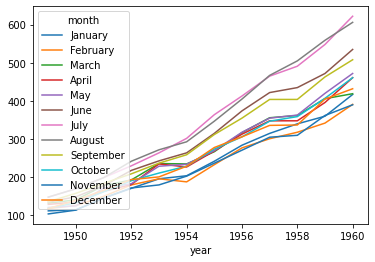

In [0]:
flights.pivot_table(index='year', columns='month', values='passengers').plot();

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####